# Performance

From the very beginning of the project I'll be evaluating the performance and scalabilty of the implementations to determine if the project is worth pursuing.

In [2]:
%matplotlib inline

In [3]:
import pandas

In [4]:
df_ftl = pandas.read_csv('results/0.0.1-0-gb3e470e.csv')
df_ansible = pandas.read_csv('results/2.10.9.csv')
df = pandas.concat([df_ftl, df_ansible])
#df

In [5]:
df2 = df.pivot(index="n", columns="name", values="time")
#df2

<AxesSubplot:title={'center':'Local Module Execution Duration'}, xlabel='num hosts', ylabel='time in seconds'>

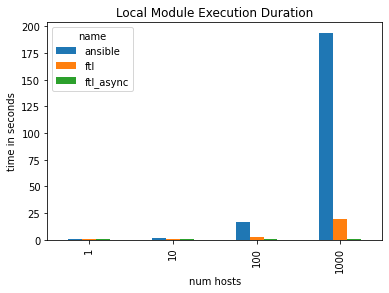

In [6]:
df2.plot.bar(title="Local Module Execution Duration", ylabel="time in seconds", xlabel="num hosts")

In [7]:
ftl_speedup = df2['ansible'] / df2['ftl']
ftl_speedup = pandas.DataFrame(ftl_speedup, columns=['ftl_speedup'])
#ftl_speedup

ftl_async_speedup = df2['ansible'] / df2['ftl_async']
ftl_async_speedup = pandas.DataFrame(ftl_async_speedup, columns=['ftl_async_speedup'])
#ftl_async_speedup

df_speedup = pandas.concat([ftl_speedup, ftl_async_speedup], axis=1)
df_speedup

<AxesSubplot:title={'center':'Speedup over Ansible 2.10.9'}, xlabel='num hosts', ylabel='speedup'>

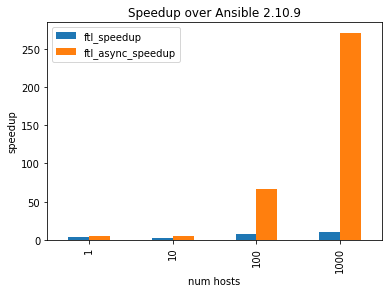

In [73]:
df_speedup.plot.bar(title="Speedup over Ansible 2.10.9", xlabel="num hosts", ylabel="speedup")

In [18]:
remote_df_ftl = pandas.read_csv('results/remote_0.0.1-7-g54b4dbc.csv')
remote_df_ansible = pandas.read_csv('results/remote_2.10.9.csv')
remote_df = pandas.concat([remote_df_ftl, remote_df_ansible])
remote_df

,cmd,name,type,n,time
0,ftl -i inventory_remote1.yml -M modules -m arg...,ftl_remote,argtest,1,0.764630
1,ftl -i inventory_remote10.yml -M modules -m ar...,ftl_remote,argtest,10,1.005892
2,ftl -i inventory_remote100.yml -M modules -m a...,ftl_remote,argtest,100,11.693291
3,ftl -i inventory_remote1000.yml -M modules -m ...,ftl_remote,argtest,1000,277.150600
0,ansible -M modules -i inventory_remote1.yml -m...,ansible_remote,argtest,1,1.043501
1,ansible -M modules -i inventory_remote10.yml -...,ansible_remote,argtest,10,2.073435
2,ansible -M modules -i inventory_remote100.yml ...,ansible_remote,argtest,100,20.927322
3,ansible -M modules -i inventory_remote1000.yml...,ansible_remote,argtest,1000,202.218750


In [19]:
remote_df2 = remote_df.pivot(index="n", columns="name", values="time")
remote_df2

name,ansible_remote,ftl_remote
n,,
1,1.043501,0.764630
10,2.073435,1.005892
100,20.927322,11.693291
1000,202.218750,277.150600


<AxesSubplot:title={'center':'Remote Module Execution Duration'}, xlabel='num hosts', ylabel='time in seconds'>

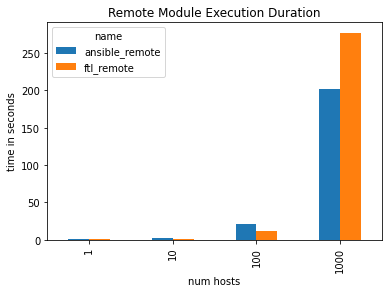

In [21]:
remote_df2.plot.bar(title="Remote Module Execution Duration", ylabel="time in seconds", xlabel="num hosts")

In [23]:
ftl_speedup = remote_df2['ansible_remote'] / remote_df2['ftl_remote']
ftl_speedup = pandas.DataFrame(ftl_speedup, columns=['ftl_speedup'])
#ftl_speedup

df_speedup = pandas.concat([ftl_speedup], axis=1)
df_speedup

,ftl_speedup
n,
1,1.364714
10,2.061290
100,1.789686
1000,0.729635


<AxesSubplot:title={'center':'Speedup over Ansible 2.10.9'}, xlabel='num hosts', ylabel='speedup'>

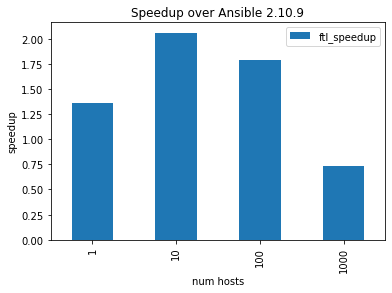

In [24]:
df_speedup.plot.bar(title="Speedup over Ansible 2.10.9", xlabel="num hosts", ylabel="speedup")

There is room for improvement at the 1000 host level.